In [3]:
!mkdir -p ~/aiffel/face_embedding

In [7]:
!ln -s ~/data ~/aiffel/face_embedding/images

ln: failed to create symbolic link '/aiffel/aiffel/face_embedding/images/data': Read-only file system


file_list: ['trump.jpg', 'biden.jpg', 'bush.jpeg', 'reagan.jpg', 'clinton.jpeg', 'obama.jpg']


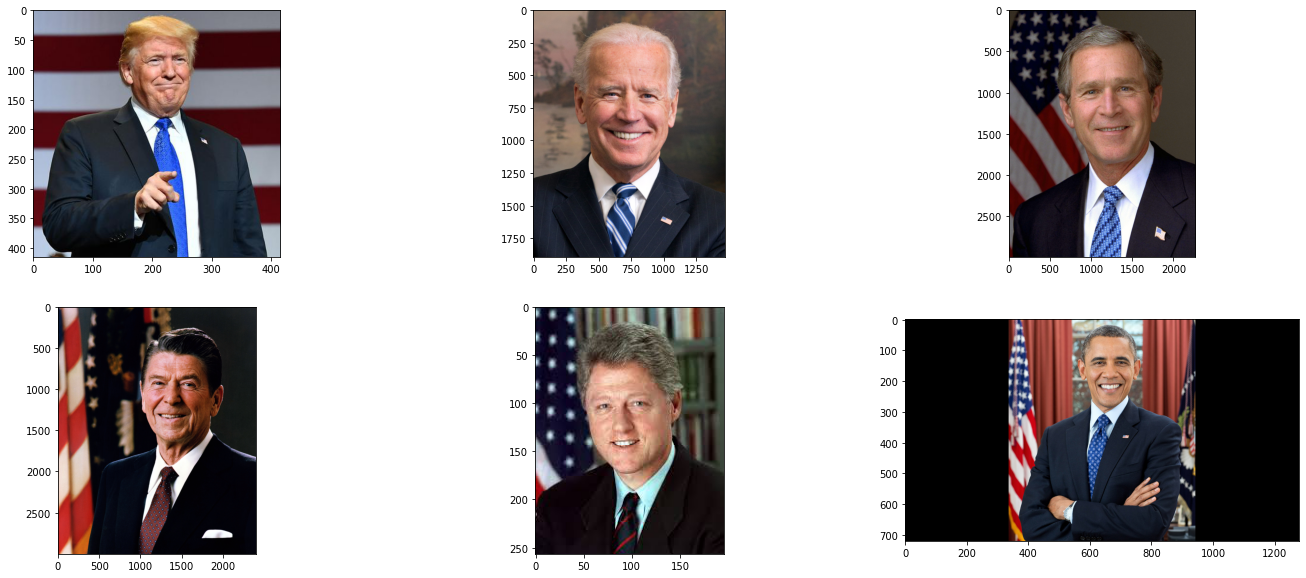

In [12]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

In [14]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

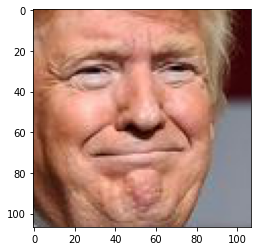

In [21]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/trump.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)
plt.show()

In [34]:
def get_face_embedding(image_file):
    cropped_face = get_cropped_face(image_file)
    return face_recognition.face_encodings(cropped_face)[0]

image_file = os.path.join(dir_path, 'obama.jpg')
embedding = get_face_embedding(image_file)  
embedding

array([-0.08126248,  0.11014761, -0.01082448, -0.05268792,  0.01033717,
       -0.00813808, -0.07251769, -0.0922646 ,  0.19304723, -0.09246384,
        0.23908533,  0.06770287, -0.22123125, -0.14119367,  0.05562152,
        0.13705511, -0.17924425, -0.07232306, -0.11183281, -0.11370818,
        0.03956435, -0.01019115,  0.0942178 ,  0.04493114, -0.12757549,
       -0.34449592, -0.05374938, -0.17703305,  0.00868226, -0.09721592,
       -0.09817187,  0.00278232, -0.17721367, -0.12789807,  0.03489833,
       -0.01991234, -0.00838933, -0.00132862,  0.18308581,  0.02447568,
       -0.1237656 ,  0.09957044,  0.02323568,  0.22983313,  0.2838524 ,
        0.06655717, -0.00558912, -0.09833544,  0.10058986, -0.23476946,
        0.06006292,  0.1341591 ,  0.08373027,  0.03900504,  0.10194533,
       -0.19337648,  0.01717628,  0.08978969, -0.16005114,  0.01892098,
        0.03082444, -0.06051281, -0.04526773,  0.04633342,  0.20678686,
        0.10299795, -0.12437531, -0.0490516 ,  0.12252682, -0.02

In [36]:
def get_distance(e1, e2):
    return np.linalg.norm((e1 - e2), ord=2)
    
file_obama = os.path.join(dir_path, 'obama.jpg')
embedding_obama = get_face_embedding(file_obama)

file_biden = os.path.join(dir_path, 'biden.jpg')
embedding_biden = get_face_embedding(file_biden)

get_distance(embedding_obama, embedding_biden)

0.846720652777963

In [37]:
files = ['trump.jpg', 'biden.jpg', 'bush.jpeg', 'reagan.jpg', 'clinton.jpeg', 'obama.jpg']
embeddings = [get_face_embedding(os.path.join(dir_path, file)) for file in files]
embeddings = np.array(embeddings)
print(embeddings.shape)


(6, 128)


In [50]:
distances = np.zeros((6, 6))
for i in range(6):
    for j in range(6):
        distances[i, j] = get_distance(embeddings[i], embeddings[j])

print('done')

done


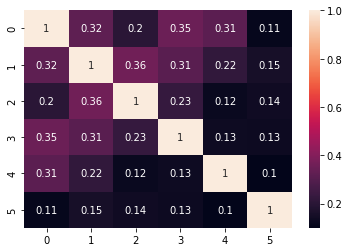

In [51]:
import seaborn as sns

#files = ['trump.jpg', 'biden.jpg', 'bush.jpeg', 'reagan.jpg', 'clinton.jpeg', 'obama.jpg']
sns.heatmap(1 - distances, annot = True)
plt.show()